In [2]:
#import pandas for reading and handling of data

import pandas as pd

filename = 'medical_clean.csv'
mrd = pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
#drop columns that are not relevent to our task
#get info for our remaining columns

mrd_clean = mrd.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
                      'TimeZone', 'Job', 'Children', 'Marital', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
                      'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   Gender              10000 non-null  object 
 3   ReAdmis             10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   HighBlood           10000 non-null  object 
 7   Stroke              10000 non-null  object 
 8   Complication_risk   10000 non-null  object 
 9   Overweight          10000 non-null  object 
 10  Arthritis           10000 non-null  object 
 11  Diabetes            10000 non-null  object 
 12  Hyperlipidemia      10000 non-null  object 
 13  BackPain            10000 non-null  object 
 14  Anxiety             10000 non-null  object 
 15  Allergic_rhinitis   10000 non-null  object 
 16  Reflu

In [4]:
#check data for missing values

mrd_clean.isnull().sum()

Age                   0
Income                0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
dtype: int64

In [5]:
#import stats to check for outliers
#import seaborn to visualize outliers
#start with variable Age and repeat process for continuous variables

from scipy import stats
import seaborn as sb

mrd_clean['zscore_age'] = stats.zscore(mrd_clean['Age'])
sum((mrd_clean.zscore_age < -3) | (mrd_clean.zscore_age > 3))

0

In [6]:
mrd_clean['zscore_income'] = stats.zscore(mrd_clean['Income'])
sum((mrd_clean.zscore_income < -3) | (mrd_clean.zscore_income > 3))

143

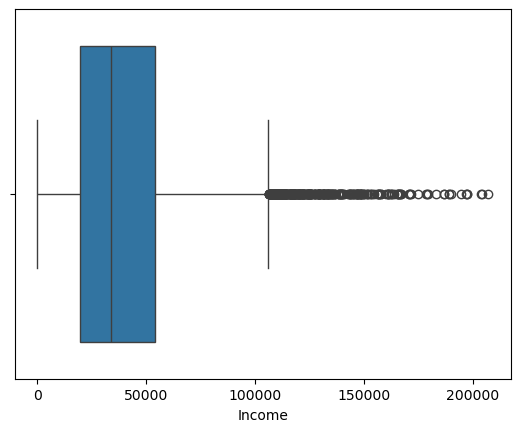

In [7]:
out = sb.boxplot(x = 'Income', data = mrd_clean)

In [8]:
mrd_clean['zscore_vitd_levels'] = stats.zscore(mrd_clean['VitD_levels'])
sum((mrd_clean.zscore_vitd_levels < -3) | (mrd_clean.zscore_vitd_levels > 3))

24

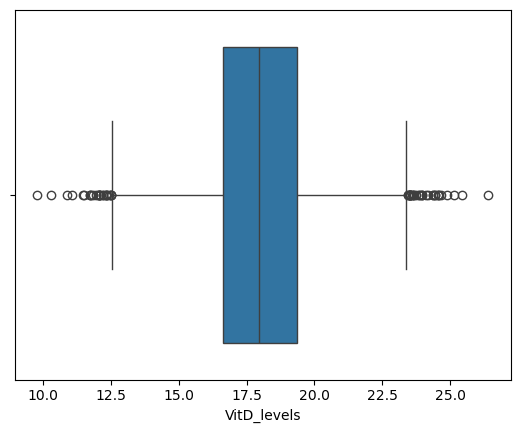

In [9]:
out = sb.boxplot(x = 'VitD_levels', data = mrd_clean)

In [10]:
mrd_clean['zscore_doc_visits'] = stats.zscore(mrd_clean['Doc_visits'])
sum((mrd_clean.zscore_doc_visits < -3) | (mrd_clean.zscore_doc_visits > 3))

8

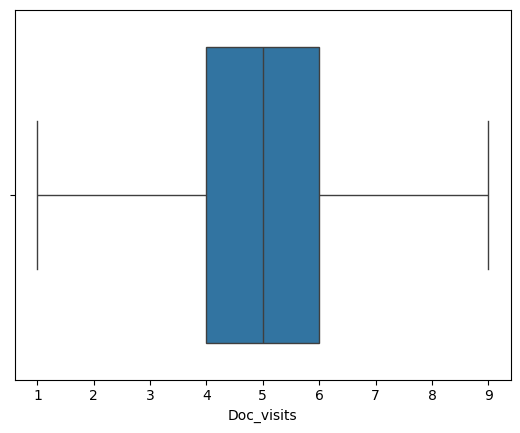

In [11]:
out = sb.boxplot(x = 'Doc_visits', data = mrd_clean)

In [12]:
mrd_clean['zscore_initial_days'] = stats.zscore(mrd_clean['Initial_days'])
sum((mrd_clean.zscore_initial_days < -3) | (mrd_clean.zscore_initial_days > 3))

0

In [13]:
#as these outliers are 'expected', they are retained
#drop columns created during the process
#make sure only the columns we are interested in are present

mrd_clean = mrd_clean.drop(['zscore_age', 'zscore_income', 'zscore_vitd_levels', 'zscore_doc_visits', 'zscore_initial_days'],
                          axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   Gender              10000 non-null  object 
 3   ReAdmis             10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   HighBlood           10000 non-null  object 
 7   Stroke              10000 non-null  object 
 8   Complication_risk   10000 non-null  object 
 9   Overweight          10000 non-null  object 
 10  Arthritis           10000 non-null  object 
 11  Diabetes            10000 non-null  object 
 12  Hyperlipidemia      10000 non-null  object 
 13  BackPain            10000 non-null  object 
 14  Anxiety             10000 non-null  object 
 15  Allergic_rhinitis   10000 non-null  object 
 16  Reflu

In [14]:
#identify categorical variables we need to encode
#map yes values to 1 and no values to 0 for our model

yesno_cols = ['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
              'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
bin_encoding = {'Yes':1, 'No':0}
for col in yesno_cols:
    mrd_clean[col] = mrd_clean[col].replace(bin_encoding)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   Gender              10000 non-null  object 
 3   ReAdmis             10000 non-null  int64  
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   HighBlood           10000 non-null  int64  
 7   Stroke              10000 non-null  int64  
 8   Complication_risk   10000 non-null  object 
 9   Overweight          10000 non-null  int64  
 10  Arthritis           10000 non-null  int64  
 11  Diabetes            10000 non-null  int64  
 12  Hyperlipidemia      10000 non-null  int64  
 13  BackPain            10000 non-null  int64  
 14  Anxiety             10000 non-null  int64  
 15  Allergic_rhinitis   10000 non-null  int64  
 16  Reflu

/var/folders/_y/fjx1srl932v_lwvdp98jq5dr0000gn/T/ipykernel_10627/985021027.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mrd_clean[col] = mrd_clean[col].replace(bin_encoding)


In [15]:
#check to make sure values were correctly replaced using a categorical variable

print(mrd_clean['ReAdmis'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: ReAdmis, Length: 10000, dtype: int64


In [16]:
#need to map variables Complication_risk since it contains non_numerical values that are not yes/no

comp_risk_map = {'High': 3, 'Medium': 2, 'Low': 1}
mrd_clean['Complication_risk'] = mrd_clean['Complication_risk'].map(comp_risk_map)
mrd_clean['Complication_risk'] = mrd_clean['Complication_risk'].astype(int)
print(mrd_clean['Complication_risk'])

0       2
1       3
2       2
3       2
4       1
       ..
9995    2
9996    2
9997    3
9998    2
9999    1
Name: Complication_risk, Length: 10000, dtype: int64


In [17]:
#check column types to identify which still need one hot encoding

print(mrd_clean.dtypes)

Age                     int64
Income                float64
Gender                 object
ReAdmis                 int64
VitD_levels           float64
Doc_visits              int64
HighBlood               int64
Stroke                  int64
Complication_risk       int64
Overweight              int64
Arthritis               int64
Diabetes                int64
Hyperlipidemia          int64
BackPain                int64
Anxiety                 int64
Allergic_rhinitis       int64
Reflux_esophagitis      int64
Asthma                  int64
Services               object
Initial_days          float64
TotalCharge           float64
dtype: object


In [18]:
#2 columns still need to be re-expressed with one hot encoding
#use get_dummies to complete this process
#creates new columns for each value - 1 indicates the value is present and 0 to indicate it is not
#change type of these columns to integer
#use .head() function to make sure the data looks the way it should

cat_cols = ['Gender', 'Services']
mrd_clean = pd.get_dummies(mrd_clean, columns = cat_cols, drop_first = False)
mrd_clean = mrd_clean.astype(int)
mrd_clean.head()

,Age,Income,ReAdmis,VitD_levels,Doc_visits,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,...,Asthma,Initial_days,TotalCharge,Gender_Female,Gender_Male,Gender_Nonbinary,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575,0,19,6,1,0,2,0,1,...,1,10,3726,0,1,0,1,0,0,0
1,51,46805,0,18,4,1,0,3,1,0,...,0,15,4193,1,0,0,0,0,1,0
2,53,14370,0,18,4,1,0,2,1,0,...,0,4,2434,1,0,0,1,0,0,0
3,78,39741,0,16,4,0,1,2,0,1,...,1,1,2127,0,1,0,1,0,0,0
4,22,1209,0,17,5,0,0,1,0,0,...,0,1,2113,1,0,0,0,1,0,0


In [19]:
#as stated above, new columns were created during one hot encoding
#verify we have these new columns for our model

mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   10000 non-null  int64
 1   Income                10000 non-null  int64
 2   ReAdmis               10000 non-null  int64
 3   VitD_levels           10000 non-null  int64
 4   Doc_visits            10000 non-null  int64
 5   HighBlood             10000 non-null  int64
 6   Stroke                10000 non-null  int64
 7   Complication_risk     10000 non-null  int64
 8   Overweight            10000 non-null  int64
 9   Arthritis             10000 non-null  int64
 10  Diabetes              10000 non-null  int64
 11  Hyperlipidemia        10000 non-null  int64
 12  BackPain              10000 non-null  int64
 13  Anxiety               10000 non-null  int64
 14  Allergic_rhinitis     10000 non-null  int64
 15  Reflux_esophagitis    10000 non-null  int64
 16  Asthm

In [20]:
#we can see that Gender and Services now have their own columns
#now that all variables are encoded properly, continuous variables need to be scaled
#import StandardScaler for this process

from sklearn.preprocessing import StandardScaler

cont_cols = ['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days']
scaler = StandardScaler()
mrd_clean[cont_cols] = scaler.fit_transform(mrd_clean[cont_cols])

In [21]:
#now rename the columns for ease of use and better readability
#verify we have all variables we want with new name

pythonic_cols = ['age', 'income', 'readmis', 'vitd_levels', 'doc_visits', 'high_blood', 'stroke', 'comp_risk', 'overweight',
                 'arthritis', 'diabetes', 'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis',
                 'asthma', 'initial_days', 'total_charge', 'gender_f', 'gender_m', 'gender_n', 'services_bw', 'services_ct',
                 'services_i', 'services_mri']
mrd_clean = mrd_clean.set_axis(pythonic_cols, axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  float64
 1   income              10000 non-null  float64
 2   readmis             10000 non-null  int64  
 3   vitd_levels         10000 non-null  float64
 4   doc_visits          10000 non-null  float64
 5   high_blood          10000 non-null  int64  
 6   stroke              10000 non-null  int64  
 7   comp_risk           10000 non-null  int64  
 8   overweight          10000 non-null  int64  
 9   arthritis           10000 non-null  int64  
 10  diabetes            10000 non-null  int64  
 11  hyperlipidemia      10000 non-null  int64  
 12  backpain            10000 non-null  int64  
 13  anxiety             10000 non-null  int64  
 14  allergic_rhinitis   10000 non-null  int64  
 15  reflux_esophagitis  10000 non-null  int64  
 16  asthm

In [22]:
#export our preprocessed data to csv file

mrd_clean.to_csv('med_task2.csv', index = False)

In [23]:
#moving onto our model, we can define our X and y
#X is our predictor variables and y is our dependent variable, totalcharge
#import train_test_split to then split our data into training and testing sets
#this will be done in a 70/30 split

from sklearn.model_selection import train_test_split

mrd_X = mrd_clean.drop(['total_charge'], axis = 1).copy()
mrd_y = mrd_clean['total_charge'].copy()

X = mrd_X
y = mrd_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
#export these sets to their own csv file for submission

pd.DataFrame(X_train, y_train).to_csv('train_set2.csv', index = False)
pd.DataFrame(X_test, y_test).to_csv('test_set2.csv', index = False)

In [25]:
#set up alpha testing
#import Ridge
#print the scores to determine best alpha for our model

from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

[0.9840351399190231, 0.9840346632602056, 0.9840240277657294, 0.9835014206407561, 0.9673105469607766, 0.6781292309252731]


In [26]:
#import numpy for numerical computation
#find our best alpha value

import numpy as np

best_alpha_index = np.argmax(ridge_scores)
best_alpha = alphas[best_alpha_index]

print("Best Alpha Value:", best_alpha)

Best Alpha Value: 0.1


In [27]:
#now we can set up our model with our best parameter - as found above to be 0.1
#then fit the model to the training data

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [28]:
#determine the scores of our model
#print our values

train_acc = ridge.score(X_train, y_train)
test_acc = ridge.score(X_test, y_test)

print("Train score is {}".format(train_acc))
print("Test score is {}".format(test_acc))

Train score is 0.9837261660545391
Test score is 0.9840351399190231


In [29]:
#can now calculate the mean squared error (MSE) and root mean squared error (RMSE)
#import mean_squared_error for this calculation
#print our values

from sklearn.metrics import mean_squared_error as mse


predictions = ridge.predict(X_test)
r_squared = test_acc
mse_val = mse(y_test, predictions)
rmse = mse(y_test, predictions, squared = False)

print("R^2 Value: {}".format(r_squared))
print("MSE Value: {}".format(mse_val))
print("RMSE Value: {}".format(rmse))

R^2 Value: 0.9840351399190231
MSE Value: 76467.09794306676
RMSE Value: 276.5268485031187


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
#due to high MSE, investigate our data
#look at maximum value of our dependent variable

print(max(mrd_clean["total_charge"]))

9180


In [31]:
#now look at minimum value of dependent variable
#due to higher values, could explain higher values of MSE and RMSE

print(min(mrd_clean["total_charge"]))

1938


In [32]:
#run cross-validation to see how the model is generalizing
#import cross_val_score to compute this
#print scores

from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge, X_train, y_train, scoring = 'r2', cv = 5)
print(f"Cross-validation R^2 scores: {scores}")

Cross-validation R^2 scores: [0.98310459 0.98420043 0.98342526 0.98331949 0.9837071 ]
